<a href="https://colab.research.google.com/github/IoT-master/PyTorchMLTemplates/blob/master/Linear_Regression_with_a_Simple_Line_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Visualization of the scatter X and y values')

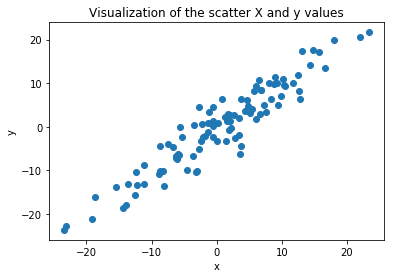

In [21]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3
# plt.axis([min(X), max(X), min(y), max(y)])
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Visualization of the scatter X and y values')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size) 
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [23]:
#This will seed the data, so the results will always be the same on every run
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [24]:
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
# This should always show 0.5152631998062134 -0.44137823581695557, where w1 is the first value and b1 is the second value.
def get_params():
  return (w[0][0].item(), b[0].item())

0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title(title)
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1+b1
  plt.plot(x1,y1, 'r')
  plt.scatter(X, y)
  plt.show()

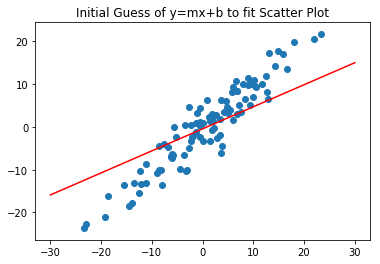

In [26]:
plot_fit('Initial Guess of y=mx+b to fit Scatter Plot')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [28]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 28.914575576782227
epoch: 1 loss: 22.89649772644043
epoch: 2 loss: 18.798683166503906
epoch: 3 loss: 16.008407592773438
epoch: 4 loss: 14.108458518981934
epoch: 5 loss: 12.814749717712402
epoch: 6 loss: 11.933838844299316
epoch: 7 loss: 11.334009170532227
epoch: 8 loss: 10.925572395324707
epoch: 9 loss: 10.647459030151367
epoch: 10 loss: 10.458084106445312
epoch: 11 loss: 10.329133987426758
epoch: 12 loss: 10.241328239440918
epoch: 13 loss: 10.181537628173828
epoch: 14 loss: 10.140823364257812
epoch: 15 loss: 10.11309814453125
epoch: 16 loss: 10.094218254089355
epoch: 17 loss: 10.081360816955566
epoch: 18 loss: 10.072604179382324
epoch: 19 loss: 10.06663990020752
epoch: 20 loss: 10.062576293945312
epoch: 21 loss: 10.059807777404785
epoch: 22 loss: 10.057920455932617
epoch: 23 loss: 10.056633949279785
epoch: 24 loss: 10.055756568908691
epoch: 25 loss: 10.055156707763672
epoch: 26 loss: 10.054746627807617
epoch: 27 loss: 10.054465293884277
epoch: 28 loss: 10.05427265167236

Text(0.5, 1.0, 'Loss/Error Seen by each epoch')

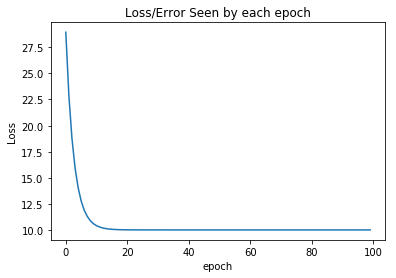

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Loss/Error Seen by each epoch')

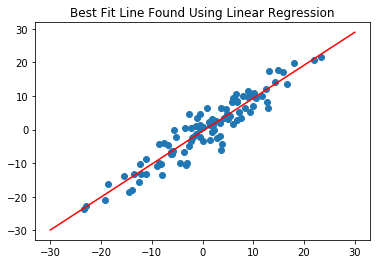

In [30]:
#@title
plot_fit("Best Fit Line Found Using Linear Regression")

In [31]:
print(get_params())

(0.9798119068145752, -0.44499996304512024)
